In [1]:
import pandas as pd

import numpy as np

pd.set_option('display.max_columns', None)

from scipy import stats

import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#use previous exercise to continue the analysis

In [3]:
dataframe1 = pd.read_csv("marketing_customer_analysis.csv")
dataframe1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [4]:
num = dataframe1.select_dtypes(include=np.number)
print(num)

      Customer Lifetime Value  Income  Monthly Premium Auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      Months Since Last Claim  Months Since Policy Inception  \
0                          32                              5   
1                          13                             42   
2                          18                      

In [5]:
cat = dataframe1.select_dtypes(include=np.object)
print(cat)

     Customer       State Response  Coverage Education Effective To Date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     EmploymentStatus Gender Location Code Marital Status     Policy Type  \
0         

Now we will try to check the normality of the numerical variables visually
Use seaborn library to construct distribution plots for the numerical variables
Use Matplotlib to construct histograms
Do the distributions for different numerical variables look like a normal distribution

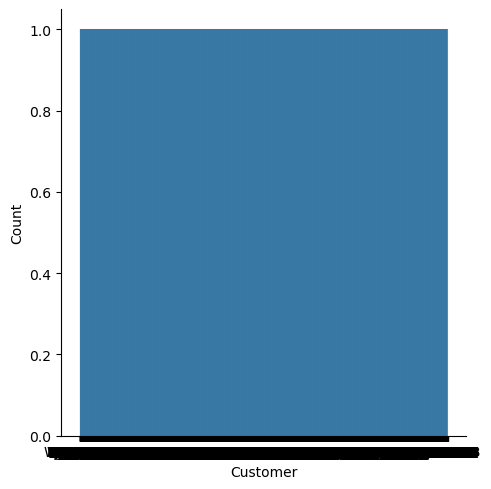

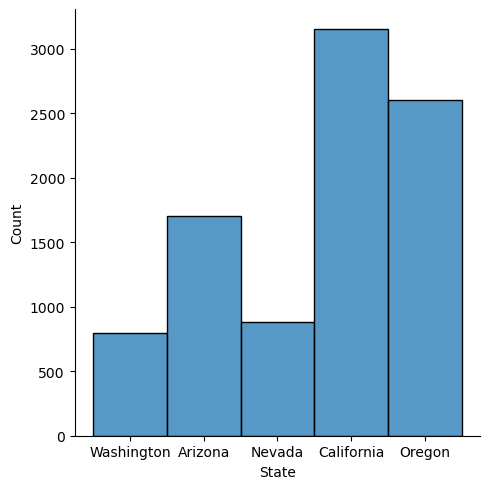

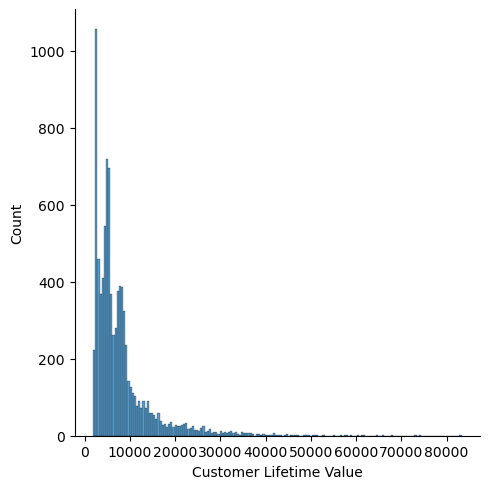

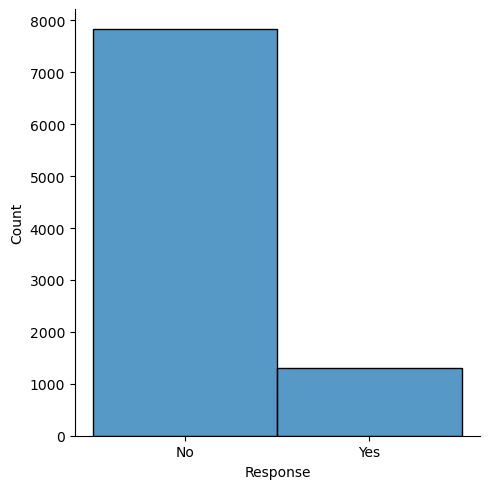

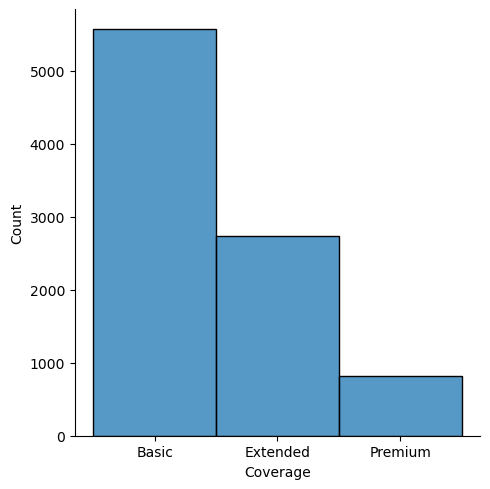

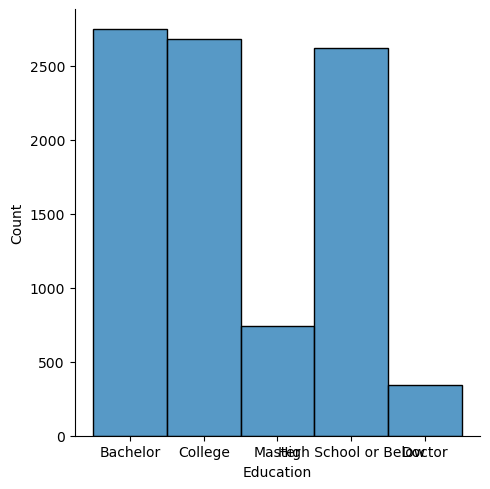

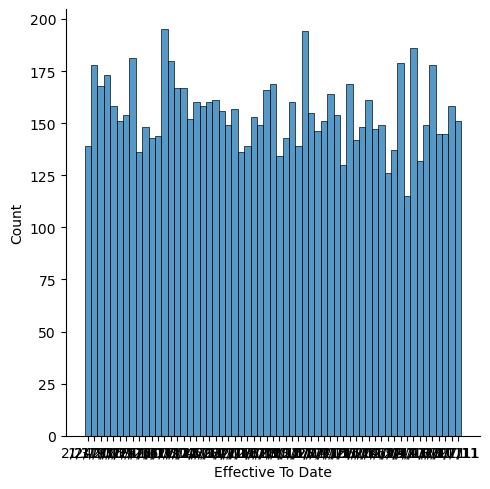

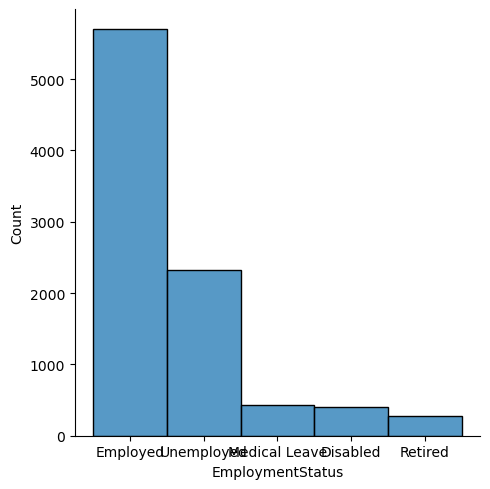

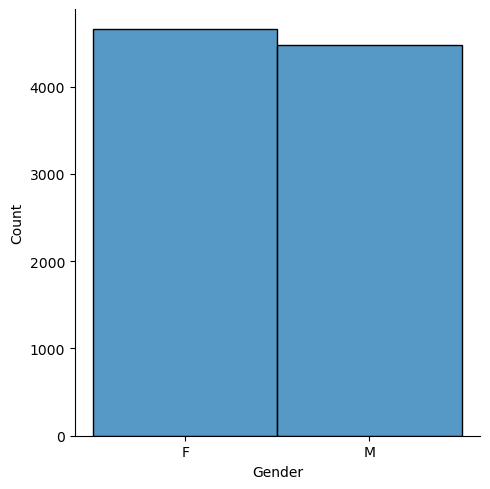

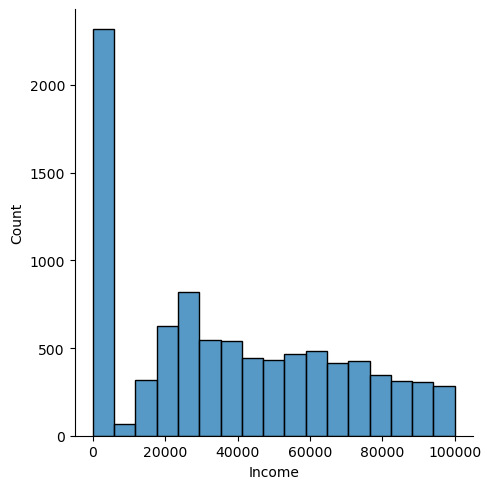

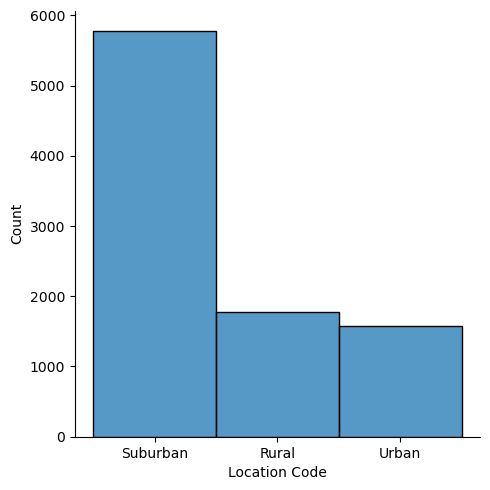

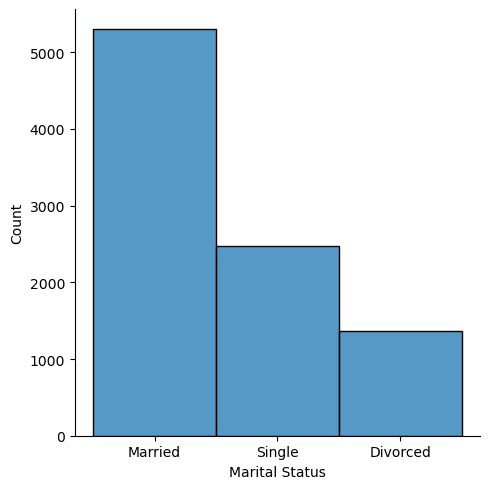

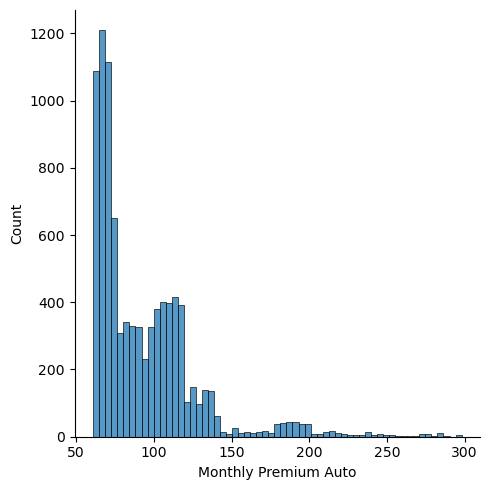

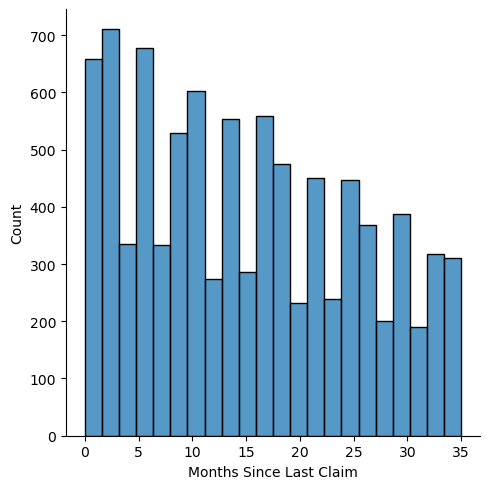

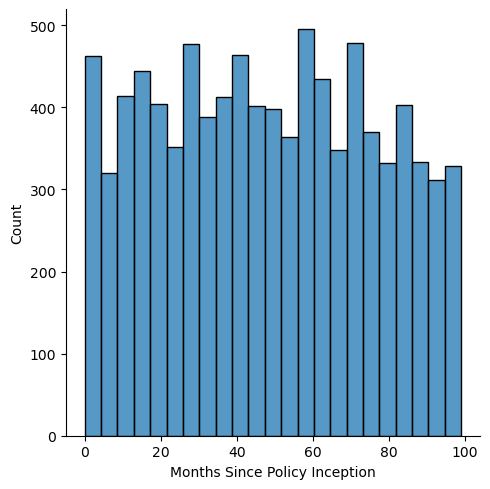

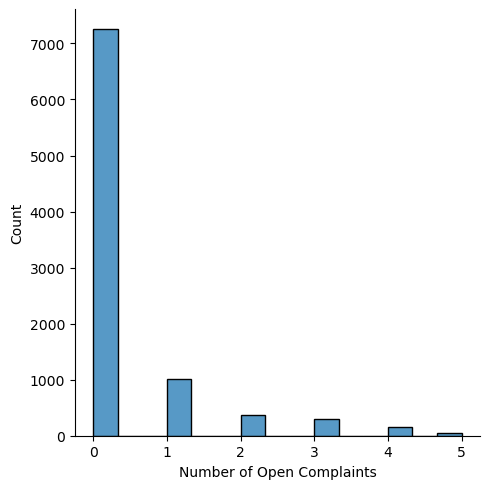

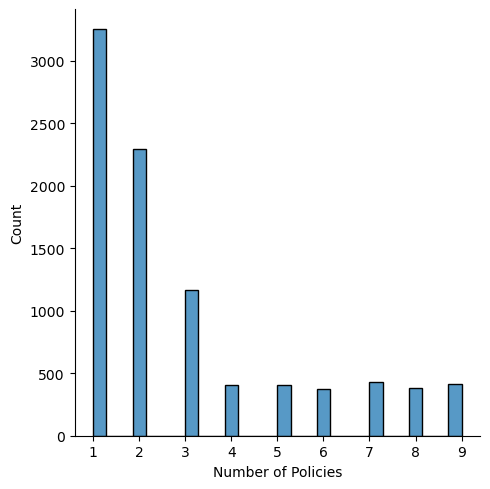

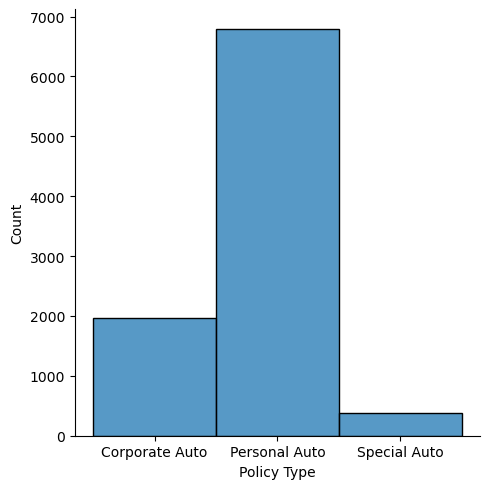

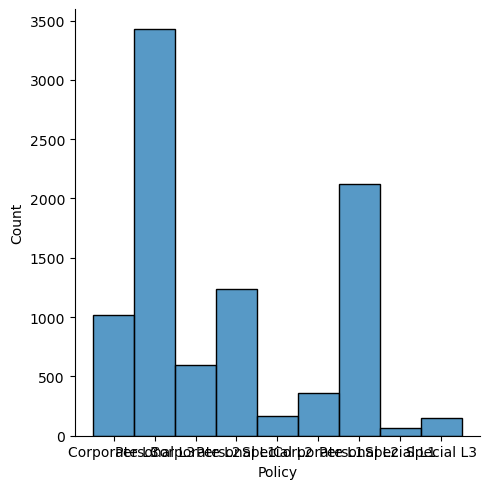

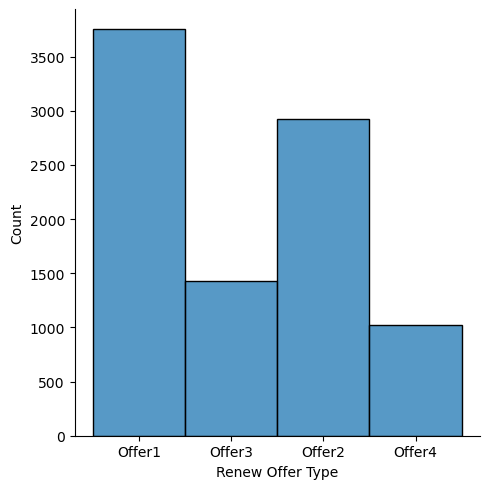

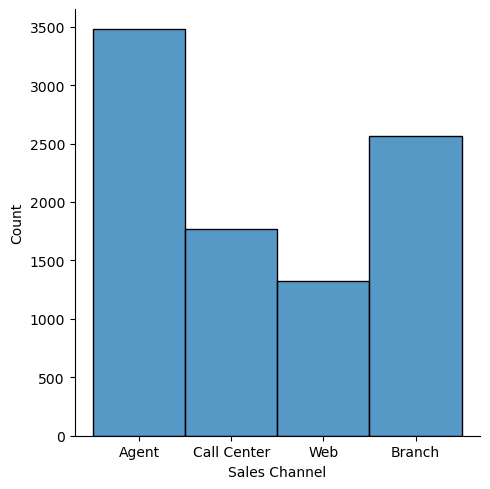

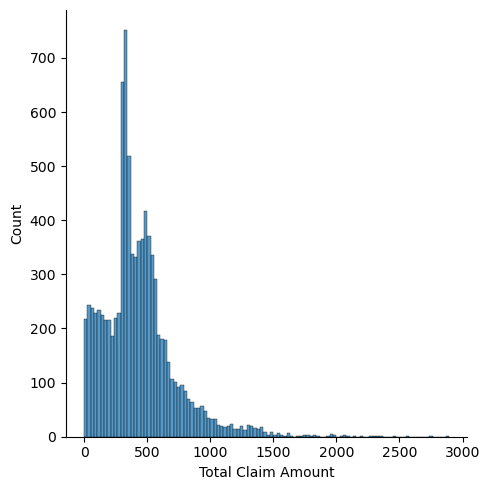

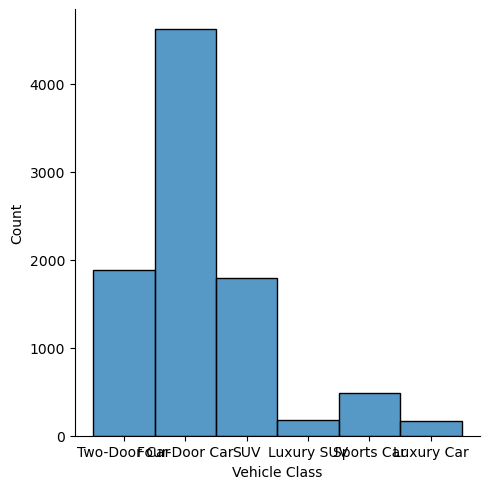

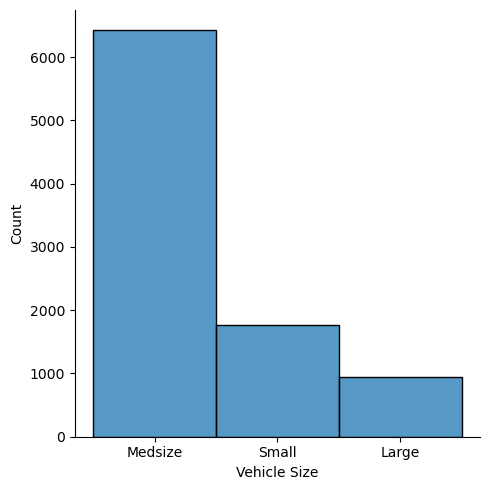

In [6]:
for column in dataframe1.columns:
    sns.displot(dataframe1[column])
    plt.show()

In [7]:
dataframe1.corr()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

<AxesSubplot:>

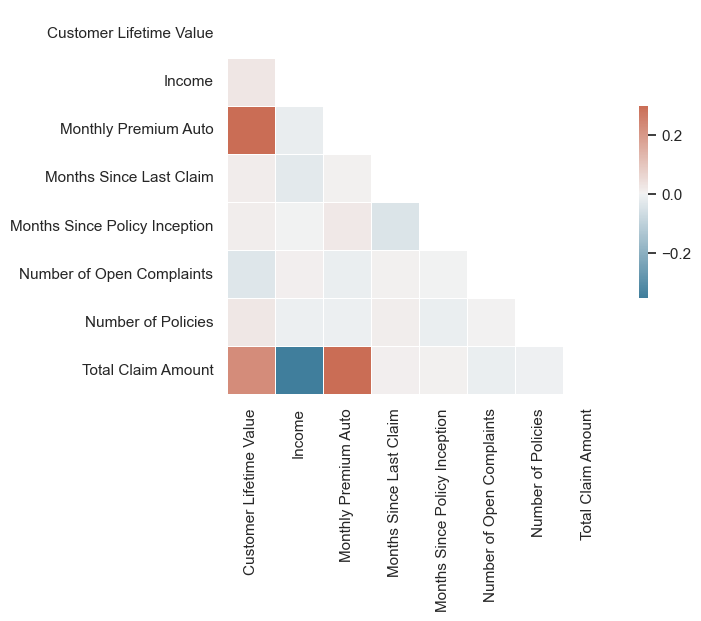

In [8]:
# How to plot it
sns.set_theme(style="white")

# Compute the correlation matrix
corr = num.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

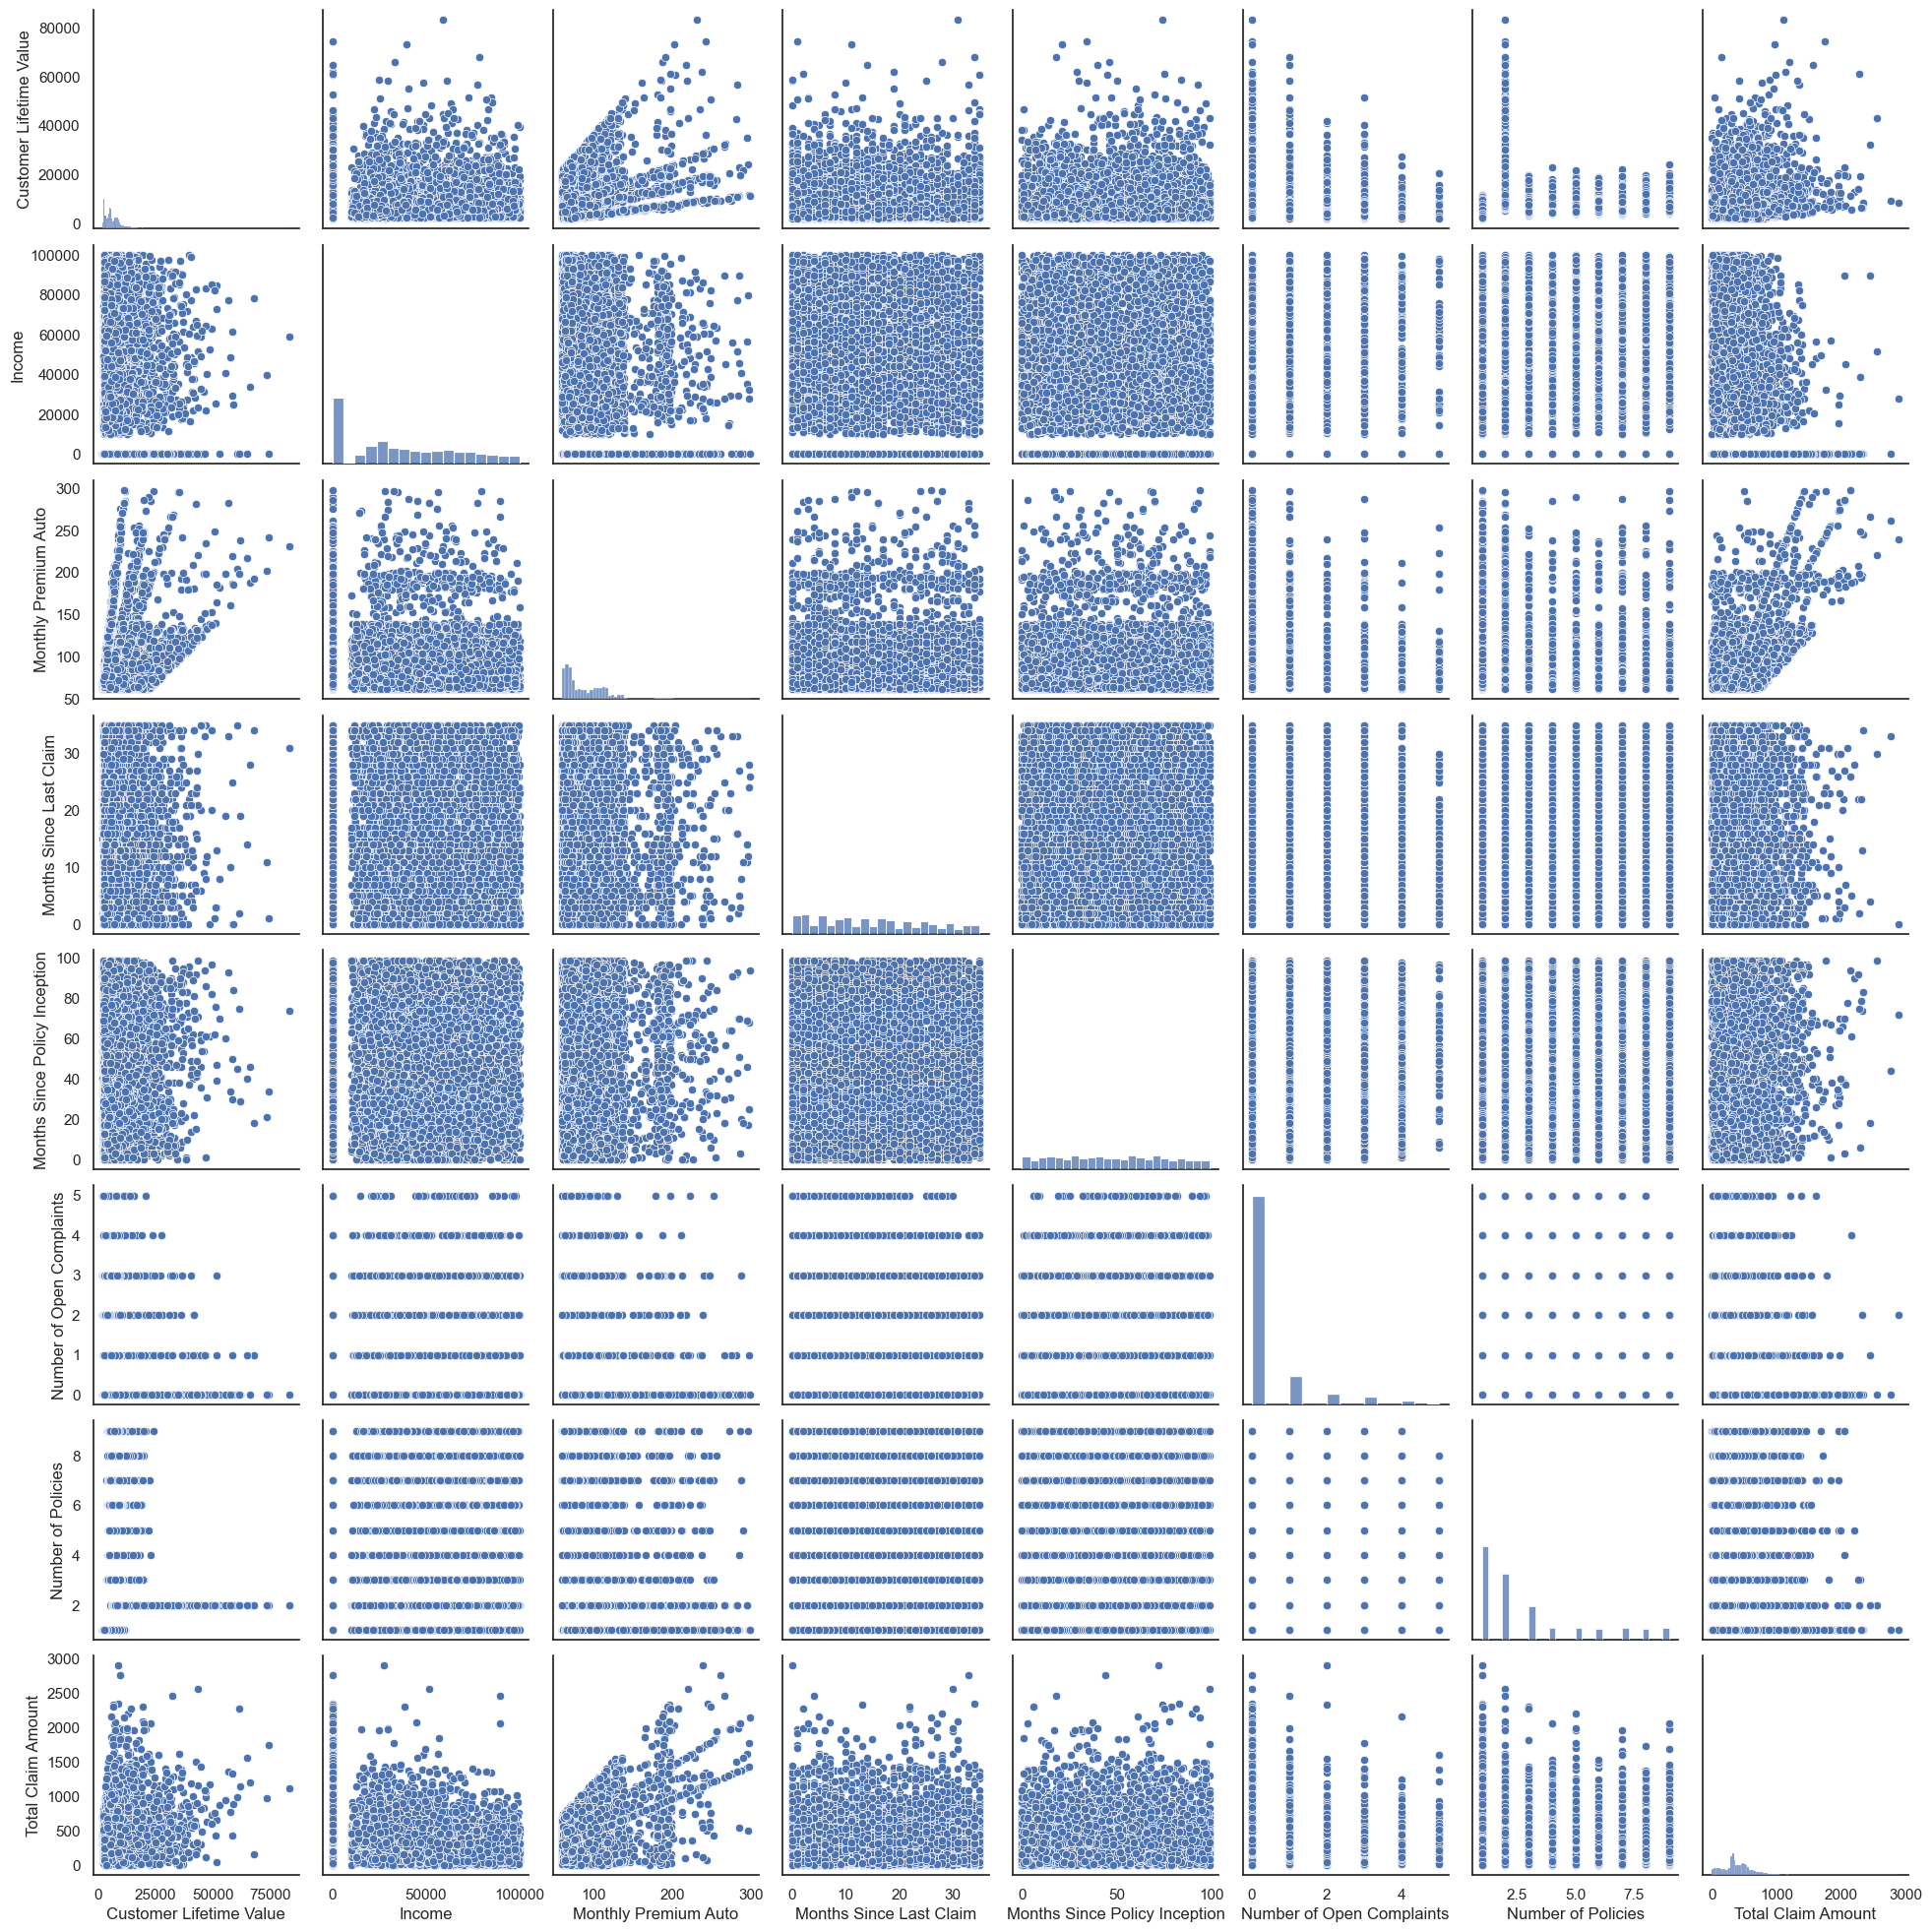

In [9]:
sns.pairplot(num)

In [ ]:
# apply normalisation to the entire (numerical) dataframe

In [12]:
normalised_dataframe1=((num-num.min())/(num.max()-num.min()))
normalised_dataframe1.sample(5)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
5044,0.039591,0.571719,0.278481,0.571429,0.929293,0.0,0.000,0.210671
164,0.067768,0.000000,0.067511,0.428571,0.121212,0.4,0.125,0.191591
8054,0.066298,0.000000,0.025316,0.828571,0.888889,0.0,0.125,0.111125
623,0.008697,0.285244,0.021097,0.028571,0.565657,0.0,0.000,0.157743
1798,0.060245,0.437663,0.464135,0.457143,0.292929,0.0,0.000,0.390520


In [ ]:
# apply x-y split

In [18]:
X = num.iloc[:,:-1]
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [19]:
Y = num.iloc[:,-1]
Y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64